<a href="https://colab.research.google.com/github/adams-x0/cv_project/blob/main/owlvit_demo_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch torchvision opencv-python
!pip install matplotlib


In [2]:
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image
import requests

# Load OWL-ViT processor and model
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

In [7]:
url = "https://images.unsplash.com/photo-1593642634315-48f5414c3ad9"  # example image
image = Image.open(requests.get(url, stream=True).raw)
image.show()


In [4]:
texts = [["laptop", "person", "dog"]]  # list of objects you want to detect


In [5]:
import torch

inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Post-process boxes
target_sizes = torch.tensor([image.size[::-1]])  # width, height
results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes)[0]

# Show detected objects
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score > 0.3:
        print(f"Detected {texts[0][label]} with score {score:.2f} at {box}")


Detected laptop with score 0.57 at tensor([1611.0975,  460.4197, 5038.8711, 3213.6213], grad_fn=<UnbindBackward0>)


/usr/local/lib/python3.12/dist-packages/transformers/models/owlvit/processing_owlvit.py:217: FutureWarning: `post_process_object_detection` method is deprecated for OwlVitProcessor and will be removed in v5. Use `post_process_grounded_object_detection` instead.
  warnings.warn(


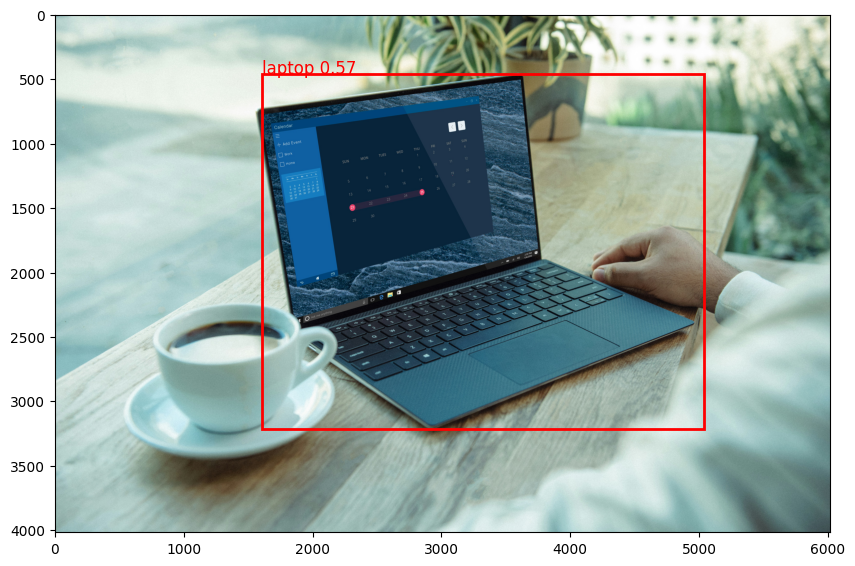

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(10,10))
plt.imshow(image)
ax = plt.gca()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score > 0.3:
        box = box.detach().cpu().numpy()
        x0, y0, x1, y1 = box
        rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x0, y0-5, f"{texts[0][label]} {score:.2f}", color='red', fontsize=12)

plt.show()
